In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 0

In [ ]:
features_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Training_set_values.csv', index_col="id")
test_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Test_set_values.csv', index_col="id")
labels_dataset = pd.read_csv('/content/drive/MyDrive/ML/archive/data/Training_set_labels.csv', index_col="id")

In [ ]:
X = features_dataset
test = test_dataset
y = labels_dataset

In [ ]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X.shape

(59400, 39)

class distribution

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


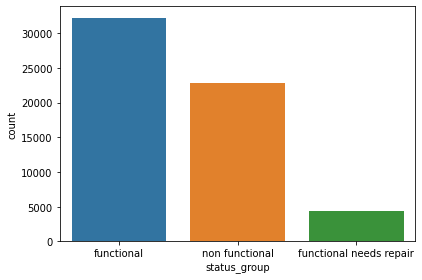

In [ ]:
print(y['status_group'].value_counts(normalize=True))
sns.countplot(x='status_group', data=y)
plt.tight_layout()


Null values and duplicates

In [ ]:
print('\nNull Values in Training \n{}'.format(X.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_dataset.isnull().sum()))
print('\nNull Values in Labels \n{}'.format(y.isnull().sum()))


print('\nDuplicated values in train {}'.format(X.duplicated().sum()))
print('Duplicated values in test {}'.format(test_dataset.duplicated().sum()))



Null Values in Training 
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group

In [ ]:
X.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [ ]:
joined_train = X.join(y)

remove duplicates in train data

In [ ]:
#Drop duplicates
def drop_duplicates(df):
  df.drop_duplicates(subset=df.columns, keep="first", inplace=True)

drop_duplicates(joined_train)
print('Duplicated values in train {}'.format(joined_train.duplicated().sum()))


Duplicated values in train 0


In [ ]:
X = joined_train.iloc[:,:-1]

In [ ]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X.shape

(59364, 39)

#Clustering 

A new feature ```Cluster``` was created by clustering longitudes and latitude based on ```amount_tsh```.

In [ ]:
# clusturing of long and lattitude\
from sklearn.cluster import KMeans
import seaborn as sns

X_l = X.loc[:, ["amount_tsh", "latitude", "longitude"]]
kmeans = KMeans(n_clusters=8, random_state=RANDOM_SEED)
X_l["Cluster"] = kmeans.fit_predict(X_l)
X_l["Cluster"] = X_l["Cluster"].astype("category")

X_l.head()

,amount_tsh,latitude,longitude,Cluster
id,,,,
69572,6000.0,-9.856322,34.938093,5
8776,0.0,-2.147466,34.698766,3
34310,25.0,-3.821329,37.460664,3
67743,0.0,-11.155298,38.486161,3
19728,0.0,-1.825359,31.130847,3


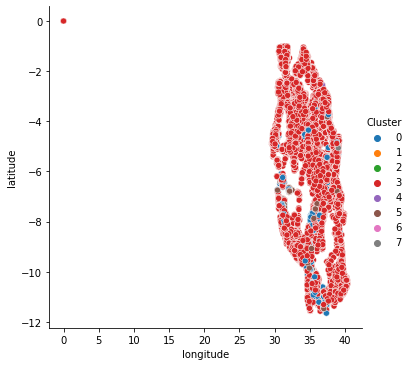

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X_l
);

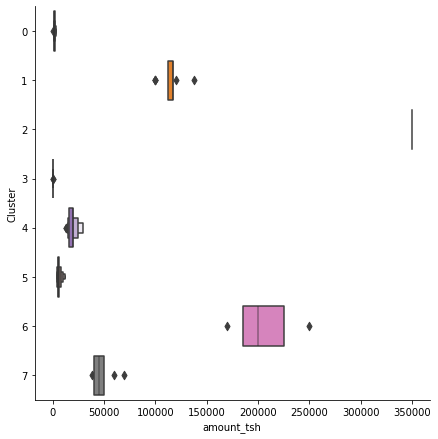

In [ ]:
X_l["amount_tsh"]  = X["amount_tsh"] 
sns.catplot(x="amount_tsh", y="Cluster", data=X_l , kind="boxen", height=6);

In [ ]:
X["Cluster"] = X_l["Cluster"].astype("object")

In [ ]:
X_test_l = test.loc[:, ["amount_tsh", "latitude", "longitude"]]
kmeans = KMeans(n_clusters=8, random_state=RANDOM_SEED)
X_test_l["Cluster"] = kmeans.fit_predict(X_test_l)
X_test_l["Cluster"] = X_test_l["Cluster"].astype("category")

X_test_l.head()

,amount_tsh,latitude,longitude,Cluster
id,,,,
50785,0.0,-4.059696,35.290799,0
51630,0.0,-3.309214,36.656709,0
17168,0.0,-5.004344,34.767863,0
45559,0.0,-9.418672,38.058046,0
49871,500.0,-10.950412,35.006123,0


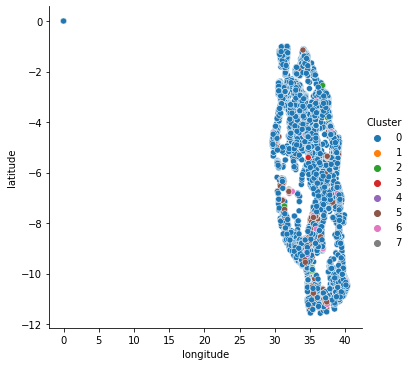

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X_test_l
);

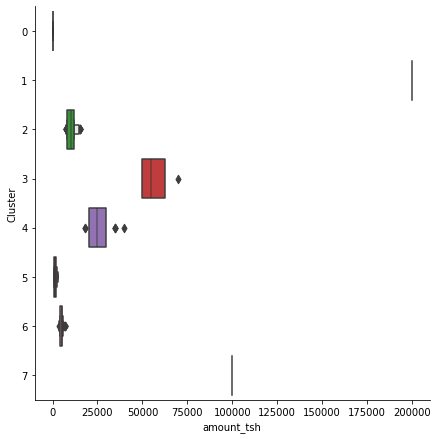

In [ ]:
X_test_l["amount_tsh"]  = X_test_l["amount_tsh"] 
sns.catplot(x="amount_tsh", y="Cluster", data=X_test_l , kind="boxen", height=6);

In [ ]:
test["Cluster"] = X_test_l["Cluster"].astype("object")

#Missing values imputation

Since all the columns with missing values were categorical columns, mode was uaesd for imputation

In [ ]:
X.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'Cluster'],
      dtype='object')

In [ ]:
for col in X.columns[X.isna().sum() > 0]:
        mode = X[col].mode()[0]
        X[col].fillna(value = mode, inplace = True)

In [ ]:
for col in test.columns[test.isna().sum() > 0]:
        mode = test[col].mode()[0]
        test[col].fillna(value = mode, inplace = True)

In [ ]:
len(X.columns)

40

In [ ]:
y = joined_train["status_group"]

In [ ]:
y.shape

(59364,)

In [ ]:
X.shape

(59364, 40)

In [ ]:
joined_processed_train = X.join(y)

In [ ]:
joined_processed_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Cluster,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,5,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,K,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,3,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,K,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,3,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3,functional


# Finding categorical attribute correlation

Columns with high correlations were removed.

In [ ]:
categorical_cols = ['funder', 'installer','wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group']

int_cols = ["gps_height","num_private","population","construction_year","num_private"]

float_cols = ["amount_tsh","longitude","latitude"]

cols = categorical_cols+int_cols+float_cols+["date_recorded"]

In [ ]:
cat_cols = categorical_cols +["status_group"]

In [ ]:
joined_processed_train_cat = joined_processed_train.loc[:,cat_cols]

In [ ]:
import scipy.stats as ss
import seaborn as sns
from collections import Counter
import math

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:
sup = pd.DataFrame(columns=joined_processed_train_cat.columns)
columns = joined_processed_train_cat.columns
for i in range(0,len(columns)):
  new = pd.DataFrame(index=[columns[i]],columns=joined_processed_train_cat.columns)
  for j in range(0,len(columns)):
    u = theil_u(joined_processed_train_cat[columns[i]].tolist(),joined_processed_train_cat[columns[j]].tolist())
    new.loc[columns[i],columns[j]] = u
  sup = sup.append(new)

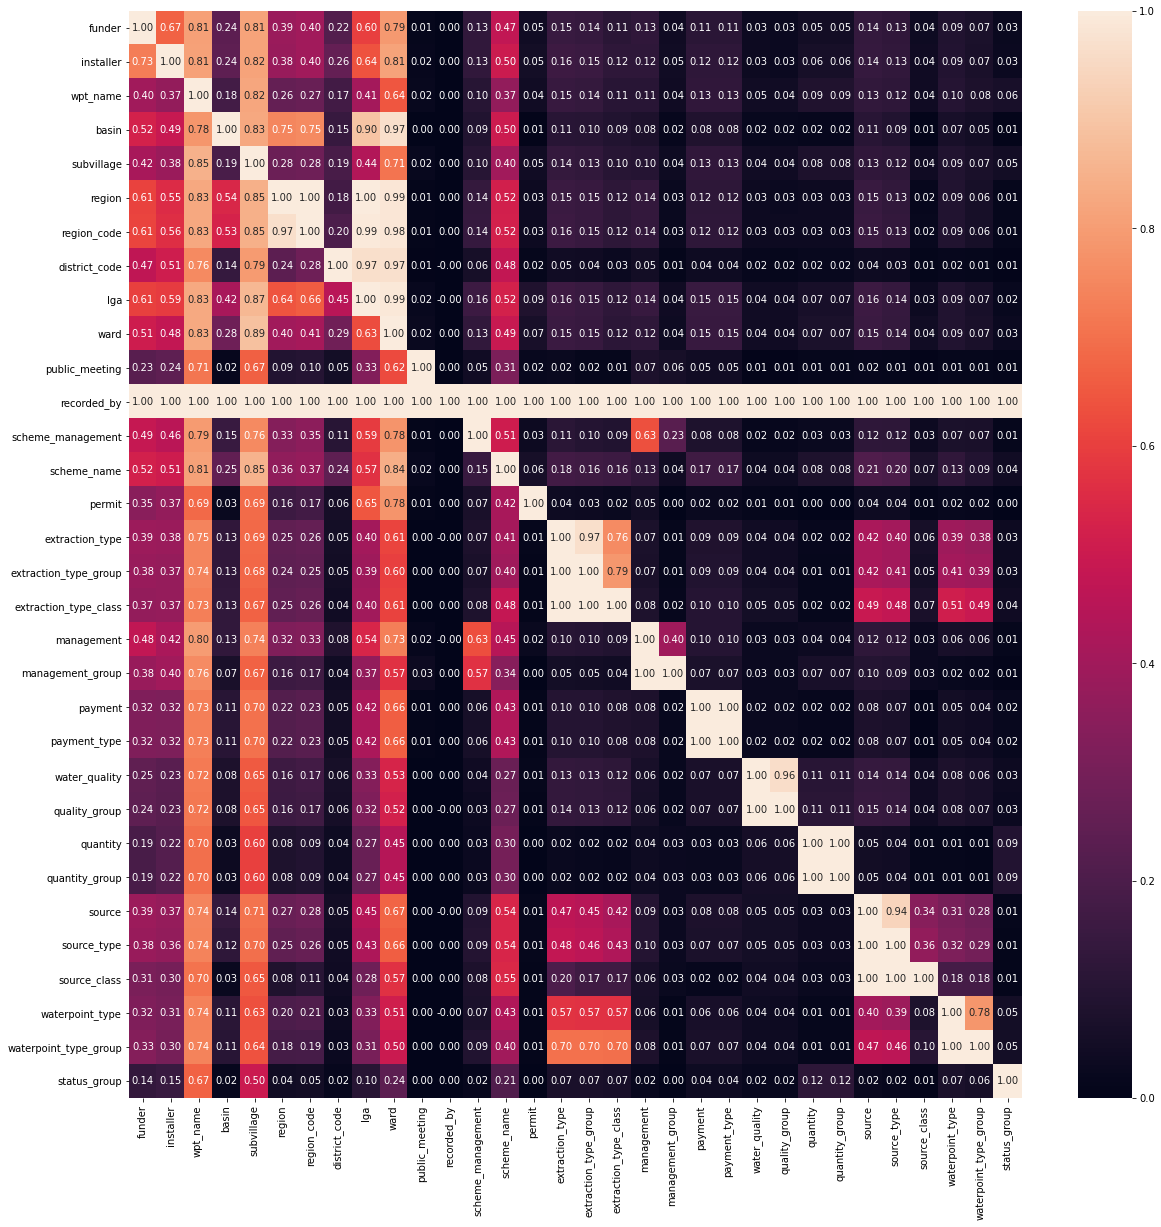

In [ ]:
sup.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(sup,annot=True,fmt='.2f')
plt.show()

In [ ]:
to_drop = ['region','recorded_by', 'extraction_type_group','extraction_type_class','management_group','payment', 'quality_group','source_type', 'source_class','waterpoint_type_group', 'payment_type', 'quantity_group']
joined_processed_train.drop(columns = to_drop, inplace = True)
test.drop(columns = to_drop, inplace = True)

#Building-Up featuers

```date recorded``` columns was seperated into 2 featuers, ```year``` and ```month```

In [ ]:
joined_processed_train['date_recorded'] = pd.to_datetime(joined_processed_train['date_recorded'])
joined_processed_train['year'] = joined_processed_train['date_recorded'].dt.year
joined_processed_train['month'] = joined_processed_train['date_recorded'].dt.month
joined_processed_train.drop(columns = 'date_recorded', inplace = True)

In [ ]:
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
test['year'] = test['date_recorded'].dt.year
test['month'] = test['date_recorded'].dt.month
test.drop(columns = 'date_recorded', inplace = True)

In [ ]:
joined_processed_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,management,water_quality,quantity,source,waterpoint_type,Cluster,status_group,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,vwc,soft,enough,spring,communal standpipe,5,functional,2011,3
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,20,2,Serengeti,Natta,280,True,Other,K,True,2010,gravity,wug,soft,insufficient,rainwater harvesting,communal standpipe,3,functional,2013,3
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,soft,enough,dam,communal standpipe multiple,3,functional,2013,2
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,VWC,K,True,1986,submersible,vwc,soft,dry,machine dbh,communal standpipe multiple,3,non functional,2013,1
19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,True,VWC,K,True,0,gravity,other,soft,seasonal,rainwater harvesting,communal standpipe,3,functional,2011,7


In [ ]:
print(joined_processed_train.shape)
print(test.shape)

(59364, 30)
(14850, 29)


#Encoding

Target encoded all the categorical columns using leave-one-out encoder.

In [ ]:
joined_processed_train['status_group'] = joined_processed_train['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0})

In [ ]:
y = joined_processed_train["status_group"]

In [ ]:
y_df = pd.DataFrame(y)

In [ ]:
y_df.value_counts()

status_group
2               32237
0               22813
1                4314
dtype: int64

In [ ]:
l = [i for i in list(joined_processed_train.columns) if i not in int_cols+float_cols+['status_group','year','month'] ]

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.5 MB/s 


In [ ]:
from category_encoders import LeaveOneOutEncoder

encoder = LeaveOneOutEncoder(cols=l, sigma=0.05, random_state=RANDOM_SEED)

X = joined_processed_train.copy()
y = X.pop('status_group')

X_encode = X.sample(frac=0.25, random_state=RANDOM_SEED)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

encoder.fit(X_encode, y_encode)

joined_processed_train_encoded = encoder.transform(joined_processed_train.loc[:,[i for i in joined_processed_train.columns if i!= "status_group"]])
joined_processed_train = joined_processed_train.drop(columns=l)
joined_processed_train = joined_processed_train_encoded.join(joined_processed_train["status_group"])

test = encoder.transform(test) 

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


One-hot encoded the ```public meeting``` and ```permit``` columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_l = ["public_meeting","permit"]

encoder_ohe = OneHotEncoder(sparse=False)
encoder_ohe.fit(joined_processed_train[ohe_l])
joined_processed_train[["public_meeting_false","public_meeting_true","permit_false","permit_true"]] = encoder_ohe.transform(joined_processed_train[ohe_l])
test[["public_meeting_false","public_meeting_true","permit_false","permit_true"]] = encoder_ohe.transform(test[ohe_l])

In [ ]:
joined_processed_train = joined_processed_train.drop(columns=ohe_l)
test = test.drop(columns=ohe_l)


Encoded train and test data

In [ ]:
joined_processed_train.head()


,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,scheme_name,construction_year,extraction_type,management,water_quality,quantity,source,waterpoint_type,Cluster,year,month,status_group,public_meeting_false,public_meeting_true,permit_false,permit_true
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1.771429,1390,1.481481,34.938093,-9.856322,1.474916,0,1.336220,1.333333,1.580793,1.208811,1.570513,1.076923,109,1.079049,1.800000,1999,1.298367,1.068062,1.20681,1.367585,1.322228,1.315879,1.601810,2011,3,2,0.0,1.0,1.0,0.0
8776,0.0,1.529412,1399,1.636364,34.698766,-2.147466,1.093750,0,1.097107,1.126011,0.969407,1.192566,1.275132,1.304348,280,1.290155,1.096447,2010,1.298367,1.282985,1.20681,1.135549,1.336222,1.315879,1.123347,2013,3,2,0.0,1.0,0.0,1.0
34310,25.0,1.302772,686,1.433628,37.460664,-3.821329,1.144655,0,1.261862,1.000000,1.349614,1.315141,1.337662,1.073394,250,1.079049,1.079179,2009,1.298367,1.068062,1.20681,1.367585,0.846154,0.825688,1.123347,2013,2,2,0.0,1.0,0.0,1.0
67743,0.0,1.213483,263,1.200000,38.486161,-11.155298,1.144655,0,0.829576,0.666667,0.543147,0.800000,0.628571,0.500000,58,1.079049,1.096447,1986,1.100000,1.068062,1.20681,0.057143,0.996772,0.825688,1.123347,2013,1,0,0.0,1.0,0.0,1.0
19728,0.0,1.302772,0,1.068966,31.130847,-1.825359,1.037694,0,1.097107,1.126011,1.143583,1.163773,1.135870,2.000000,0,1.079049,1.096447,0,1.298367,1.264151,1.20681,1.277097,1.336222,1.315879,1.123347,2011,7,2,0.0,1.0,0.0,1.0


In [ ]:
test.head()


,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,scheme_name,construction_year,extraction_type,management,water_quality,quantity,source,waterpoint_type,Cluster,year,month,public_meeting_false,public_meeting_true,permit_false,permit_true
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,1.860000,1996,1.650000,35.290799,-4.059696,1.144655,0,1.223731,2.000000,1.349614,1.019944,1.386667,1.500000,321,1.280660,1.096447,2012,0.327343,1.310044,1.20681,1.277097,1.336222,0.311713,1.520196,2013,2,0.0,1.0,0.0,1.0
51630,0.0,0.960618,1569,1.165689,36.656709,-3.309214,1.144655,0,1.261862,1.126011,1.361222,1.192566,1.418301,1.222222,300,1.079049,1.428571,2000,1.298367,1.068062,1.20681,1.135549,1.322228,1.315879,1.520196,2013,2,0.0,1.0,0.0,1.0
17168,0.0,0.960618,1567,1.165689,34.767863,-5.004344,1.144655,0,1.223731,1.126011,1.044747,1.192566,0.991597,0.818182,500,1.079049,1.000000,2010,0.327343,1.068062,1.20681,1.135549,1.336222,0.311713,1.520196,2013,2,0.0,1.0,0.0,1.0
45559,0.0,0.250000,267,0.250000,38.058046,-9.418672,1.144655,0,0.829576,0.666667,0.749216,0.919355,0.527778,0.666667,250,1.079049,1.096447,1987,0.327343,1.068062,1.20681,0.057143,1.048398,0.311713,1.520196,2013,1,0.0,1.0,0.0,1.0
49871,500.0,2.000000,1260,2.000000,35.006123,-10.950412,1.144655,0,0.829576,1.126011,1.189970,1.019944,1.177143,1.857143,60,1.538129,1.866667,2000,1.298367,1.557181,1.20681,1.367585,1.322228,1.315879,1.520196,2013,3,0.0,1.0,0.0,1.0


# Balance the class distribution.

In [ ]:
X_selected = joined_processed_train.drop(columns=["status_group"])

In [ ]:
X_selected.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,scheme_management,scheme_name,construction_year,extraction_type,management,water_quality,quantity,source,waterpoint_type,Cluster,year,month,public_meeting_false,public_meeting_true,permit_false,permit_true
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1.771429,1390,1.481481,34.938093,-9.856322,1.474916,0,1.336220,1.333333,1.580793,1.208811,1.570513,1.076923,109,1.079049,1.800000,1999,1.298367,1.068062,1.20681,1.367585,1.322228,1.315879,1.601810,2011,3,0.0,1.0,1.0,0.0
8776,0.0,1.529412,1399,1.636364,34.698766,-2.147466,1.093750,0,1.097107,1.126011,0.969407,1.192566,1.275132,1.304348,280,1.290155,1.096447,2010,1.298367,1.282985,1.20681,1.135549,1.336222,1.315879,1.123347,2013,3,0.0,1.0,0.0,1.0
34310,25.0,1.302772,686,1.433628,37.460664,-3.821329,1.144655,0,1.261862,1.000000,1.349614,1.315141,1.337662,1.073394,250,1.079049,1.079179,2009,1.298367,1.068062,1.20681,1.367585,0.846154,0.825688,1.123347,2013,2,0.0,1.0,0.0,1.0
67743,0.0,1.213483,263,1.200000,38.486161,-11.155298,1.144655,0,0.829576,0.666667,0.543147,0.800000,0.628571,0.500000,58,1.079049,1.096447,1986,1.100000,1.068062,1.20681,0.057143,0.996772,0.825688,1.123347,2013,1,0.0,1.0,0.0,1.0
19728,0.0,1.302772,0,1.068966,31.130847,-1.825359,1.037694,0,1.097107,1.126011,1.143583,1.163773,1.135870,2.000000,0,1.079049,1.096447,0,1.298367,1.264151,1.20681,1.277097,1.336222,1.315879,1.123347,2011,7,0.0,1.0,0.0,1.0


In [ ]:
X_selected = X_selected.values
y = y_df.values.flatten()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state = RANDOM_SEED)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1, random_state=RANDOM_SEED)
X_resampled, y_resampled = smote.fit_sample(X_selected, y_df)
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_resampled).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

2    32237
0    22813
1     4314
dtype: int64
2    32237
1    32237
0    32237
dtype: int64


In [ ]:
smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1, random_state=RANDOM_SEED)
X_train_resampled, y_train_resampled = smote_train.fit_sample(X_train, y_train)
print(pd.DataFrame(y_train).value_counts())
print(pd.DataFrame(y_train_resampled).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2    24215
0    17079
1     3229
dtype: int64
2    24215
1    24215
0    24215
dtype: int64


#Train XGBoostClassifier

use cross validation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1, random_state=RANDOM_SEED)
scores = cross_val_score(clf_xg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(scores.mean(), '+/-', scores.std()) 

0.8603482689792828 +/- 0.043764800698946595


In [ ]:
clf_xg.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
              eval_metric='merror', gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=16, maximize=False,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nrounds='min.error.idx', nthread=None, num_class=3,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

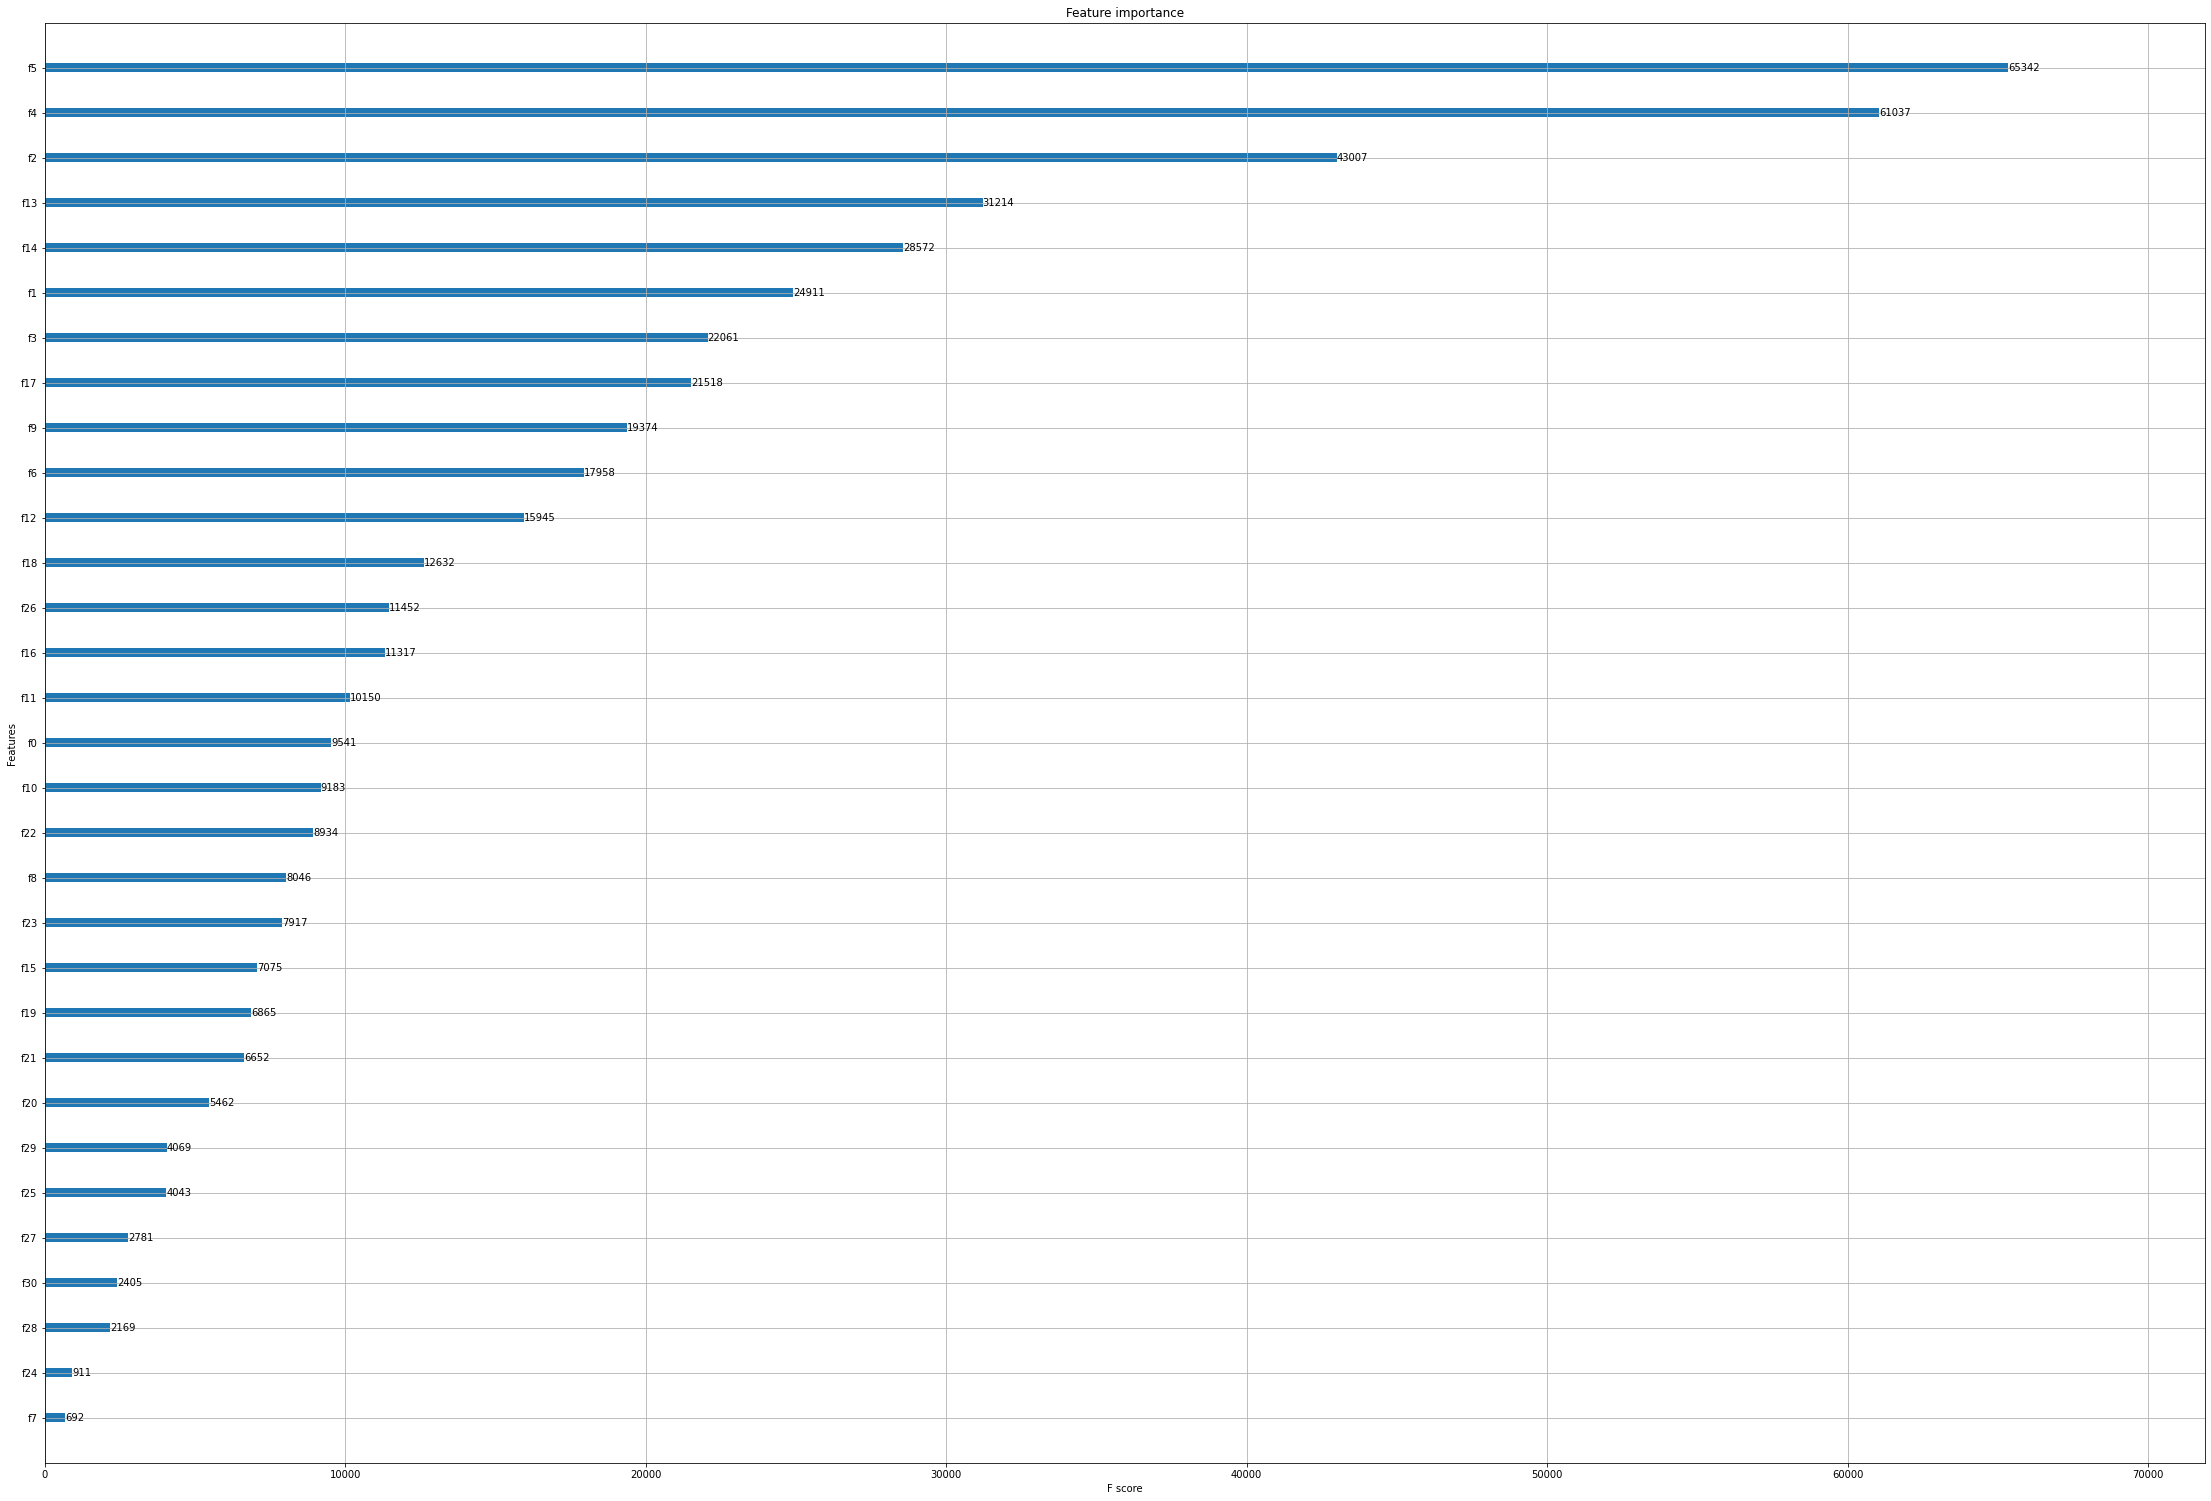

In [ ]:
from xgboost import plot_importance

plot_importance(clf_xg, ax=plt.axes((5,5,5,5)))

In [ ]:
pd.DataFrame(X_selected).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,6000.0,1.771429,1390.0,1.481481,34.938093,-9.856322,1.474916,0.0,1.336220,1.333333,1.580793,1.208811,1.570513,1.076923,109.0,1.079049,1.800000,1999.0,1.298367,1.068062,1.20681,1.367585,1.322228,1.315879,1.601810,2011.0,3.0,0.0,1.0,1.0,0.0
1,0.0,1.529412,1399.0,1.636364,34.698766,-2.147466,1.093750,0.0,1.097107,1.126011,0.969407,1.192566,1.275132,1.304348,280.0,1.290155,1.096447,2010.0,1.298367,1.282985,1.20681,1.135549,1.336222,1.315879,1.123347,2013.0,3.0,0.0,1.0,0.0,1.0
2,25.0,1.302772,686.0,1.433628,37.460664,-3.821329,1.144655,0.0,1.261862,1.000000,1.349614,1.315141,1.337662,1.073394,250.0,1.079049,1.079179,2009.0,1.298367,1.068062,1.20681,1.367585,0.846154,0.825688,1.123347,2013.0,2.0,0.0,1.0,0.0,1.0
3,0.0,1.213483,263.0,1.200000,38.486161,-11.155298,1.144655,0.0,0.829576,0.666667,0.543147,0.800000,0.628571,0.500000,58.0,1.079049,1.096447,1986.0,1.100000,1.068062,1.20681,0.057143,0.996772,0.825688,1.123347,2013.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.302772,0.0,1.068966,31.130847,-1.825359,1.037694,0.0,1.097107,1.126011,1.143583,1.163773,1.135870,2.000000,0.0,1.079049,1.096447,0.0,1.298367,1.264151,1.20681,1.277097,1.336222,1.315879,1.123347,2011.0,7.0,0.0,1.0,0.0,1.0


In [ ]:
preds_train_resampled = clf_xg.predict(X_train_resampled)
preds_train = clf_xg.predict(X_train)
preds_test = clf_xg.predict(X_test)

Accuracy Score:  0.9623649253217702


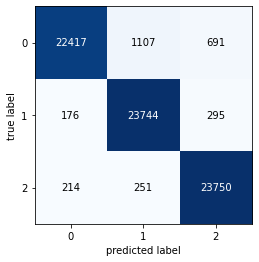

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", accuracy_score(y_train_resampled, preds_train_resampled))
cm = confusion_matrix(y_train_resampled, preds_train_resampled)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
pd.DataFrame(preds_train).value_counts()

2    24603
0    16579
1     3341
dtype: int64

Accuracy Score:  0.9667138332996429


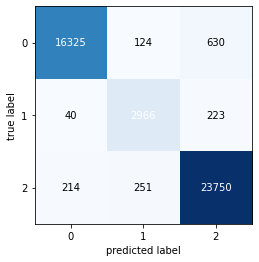

In [ ]:
print("Accuracy Score: ", accuracy_score(y_train, preds_train))
cm = confusion_matrix(y_train, preds_train)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  0.9706893066504952


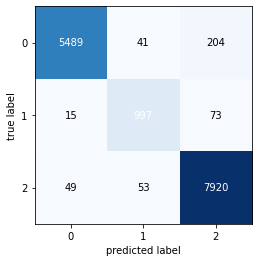

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, preds_test))
cm = confusion_matrix(y_test, preds_test)
plot_confusion_matrix(cm)
plt.show()

#Create submission file

In [ ]:
test.index

Int64Index([50785, 51630, 17168, 45559, 49871, 52449, 24806, 28965, 36301,
            54122,
            ...
            59757, 64579, 57731, 65541, 68174, 39307, 18990, 28749, 33492,
            68707],
           dtype='int64', name='id', length=14850)

In [ ]:
preds_main_test = clf_xg.predict(test.values)
submission_preds = pd.Series(preds_main_test)

In [ ]:
submission_preds_mapped = submission_preds.map({2: 'functional', 1: 'functional needs repair', 0: 'non functional'})
submission_preds_mapped.value_counts()

functional                 8722
non functional             5213
functional needs repair     915
dtype: int64

In [ ]:
submission_preds_mapped

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
14845    non functional
14846        functional
14847        functional
14848        functional
14849    non functional
Length: 14850, dtype: object

In [ ]:
submit_df = pd.concat([pd.DataFrame(test.index), submission_preds_mapped], axis = 1)
submit_df.rename(columns = {0: 'status_group'}, inplace = True)
submit_df.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [ ]:
submit_df.tail()

,id,status_group
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
14849,68707,non functional


In [ ]:
submit_df.to_csv('/content/drive/MyDrive/ML/archive/data/submissions/submission1.csv', index = False)